In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<Axes: xlabel='time'>

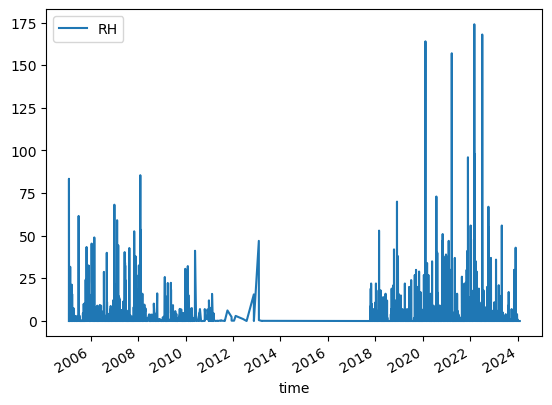

In [ ]:
#Load in Precipitation File from BOM
df = pd.read_csv('Data/Warrangamba_Prep.csv', usecols=[2,3,4,5])
df['time'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
df.drop(['Day', 'Year', 'Month'], axis= 1, inplace = True)
df.dropna(axis= 0, inplace=True)
df.set_index('time', inplace=True)
df.rename(columns={'Rainfall amount (millimetres)':'RH'}, inplace=True)

#df.plot()

df_monthly = df.resample('M').sum()
df_monthly = df_monthly.loc[df_monthly['RH'] > 0]
df_monthly = df_monthly.groupby(df_monthly.index.month).mean()

df_monthly.plot()

<Axes: xlabel='time'>

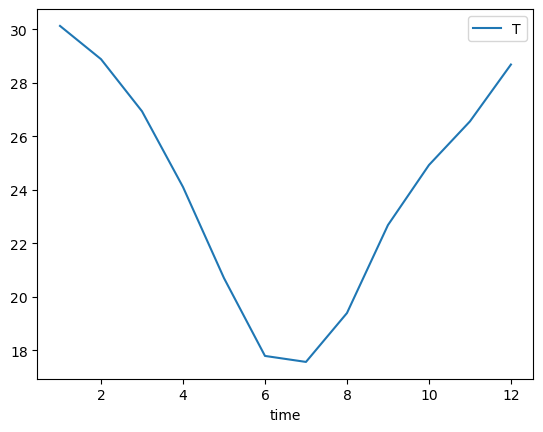

In [62]:
#Load in Temperature file from BOM
df_temp = pd.read_csv('Data/Badgery_Creek_Temp1.csv', usecols= [2,3,4])
df_temp.rename(columns={'Mean maximum temperature (°C)': 'T'}, inplace=True)
df_temp['time'] = pd.to_datetime(df_temp[['Year', 'Month']].assign(day=1))
df_temp.drop(['Year', 'Month'], axis= 1, inplace = True)
df_temp.dropna(axis= 0, inplace=True)
df_temp.set_index('time', inplace=True)
df_temp = df_temp.loc[df_temp['T'] > 0]
df_temp = df_temp.groupby(df_temp.index.month).mean()
df_temp.plot()

In [87]:
#Load in Camel Precipitation Data
df_camel = pd.read_csv('Data/Prep_Camel_SILO.csv')
df_camel['time'] = pd.to_datetime(df_camel[['year', 'month', 'day']])
df_camel.drop(['day', 'year', 'month'], axis= 1, inplace = True)
df_camel.set_index('time', inplace=True)
df_camel = df_camel['212260']

<Axes: xlabel='time'>

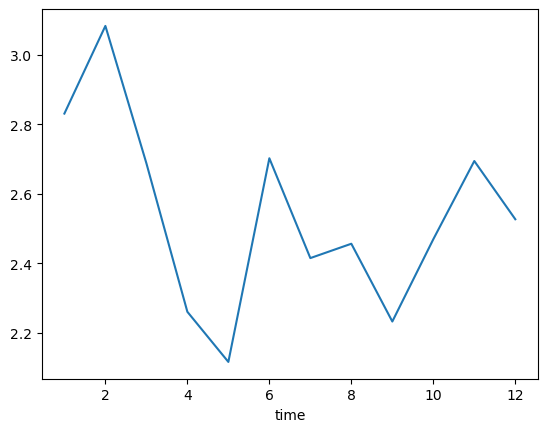

In [ ]:
df_camel_monthly = df_camel.groupby(df_camel.index.month).mean()
df_camel_monthly.plot()

In [88]:
df_camel

time
1900-01-01     0.001468
1900-01-02     0.000000
1900-01-03     0.621848
1900-01-04     0.003653
1900-01-05    15.538718
                ...    
2018-12-27     0.000000
2018-12-28     0.096275
2018-12-29     0.349248
2018-12-30     0.000000
2018-12-31     0.000000
Name: 212260, Length: 43464, dtype: float64

In [89]:
#Load in Camel Evap Data
df_evap = pd.read_csv('Data/evap_syn_SILO.csv')
df_evap['time'] = pd.to_datetime(df_evap[['year', 'month', 'day']])
df_evap.drop(['day', 'year', 'month'], axis= 1, inplace = True)
df_evap.set_index('time', inplace=True)
df_evap = df_evap['212260']

In [90]:
df_evap

time
1900-01-01    5.665330
1900-01-02    6.251898
1900-01-03    6.470702
1900-01-04    5.379191
1900-01-05    5.525967
                ...   
2018-12-27    9.363467
2018-12-28    9.325681
2018-12-29    9.475430
2018-12-30    9.073066
2018-12-31    7.176039
Name: 212260, Length: 43464, dtype: float64

In [98]:
df_camel_data = pd.concat([df_camel, df_evap], axis = 1)

df_camel_data.columns = ['P', 'Evap']
df_camel_data

,P,Evap
time,,
1900-01-01,0.001468,5.665330
1900-01-02,0.000000,6.251898
1900-01-03,0.621848,6.470702
1900-01-04,0.003653,5.379191
1900-01-05,15.538718,5.525967
...,...,...
2018-12-27,0.000000,9.363467
2018-12-28,0.096275,9.325681
2018-12-29,0.349248,9.475430
